## Coursera IBM Data Science Capstone Project

### Segmenting and Clustering Neighborhoods in City of Toronto
##### Feburary 2020

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# handle JSON files
import json

# transform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

import requests
import urllib.request
import time

# map rendering
import folium

### Preparing Toronto Data

In [2]:
geodata = pd.read_csv('/Users/hahatrisha/Downloads/TorontoGeoData.csv')
geodata.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
print("The shape of the Toronto Neighbourhood data (geodata) is:", geodata.shape)
geodata.head()

The shape of the Toronto Neighbourhood data (geodata) is: (103, 5)


,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [4]:
borough = geodata['Borough'].unique()
borough

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       'Mississauga', 'Etobicoke', "Queen's Park"], dtype=object)

In [5]:
color = ['#ffb921','#ff298d', '#f6ff00', '#8ded2d', '#1ef5fc', '#4287f5', '#bd0000', '#ff9191', '#cd59ff', '#3cf20f', '#f2af74']
borough_color = dict(zip(borough,color))
borough_color

{'Scarborough': '#ffb921',
 'North York': '#ff298d',
 'East York': '#f6ff00',
 'East Toronto': '#8ded2d',
 'Central Toronto': '#1ef5fc',
 'Downtown Toronto': '#4287f5',
 'York': '#bd0000',
 'West Toronto': '#ff9191',
 'Mississauga': '#cd59ff',
 'Etobicoke': '#3cf20f',
 "Queen's Park": '#f2af74'}

### Getting Toronto Map with Neighbourhoods Pins

In [6]:
# use geopy library to get the coordinates of the City of Toronto
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent='foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geographical coordinate of Toronto is {}, {}.".format(latitude,longitude))

The geographical coordinate of Toronto is 43.653963, -79.387207.


In [7]:
# create a city map with the latitude and longitude values
map_Toronto = folium.Map(location=[latitude,longitude], zoom_start=11, min_zoom=10, max_zoom=12)
for lat, lng, borough, neighbourhood in zip(geodata['Latitude'], geodata['Longitude'], geodata['Borough'], geodata['Neighbourhood']):
    label = "{}, {}".format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker([lat,lng],
                        radius=3,
                        popup=label,
                        weight=2,
                        color='#333333',
                        fill=True,
                        fill_color=borough_color[borough],
                        fill_opacity=0.7,
                        parse_html=False).add_to(map_Toronto)
map_Toronto

### Preparing Venue Data for the Neighbourhoods in Toronto

In [8]:
# Define Foursquare credentials and version
CLIENT_ID = 'MSFZ2TAEVCVC20M2P4JQKGPIJFRBQXHL41NQNX41OTR4S5Y5'
CLIENT_SECRET = '241QCK03ONIQ0T0WUETYR4J2UL4FGJEU21BUMGPMWVPEH5PN'
VERSION = '20180604'
print('FourSquare Credentails')
print('client ID: ' + CLIENT_ID)
print('client secret: ' + CLIENT_SECRET)

FourSquare Credentails
client ID: MSFZ2TAEVCVC20M2P4JQKGPIJFRBQXHL41NQNX41OTR4S5Y5
client secret: 241QCK03ONIQ0T0WUETYR4J2UL4FGJEU21BUMGPMWVPEH5PN


In [9]:
RADIUS = 500
LIMIT = 100

#### 1. Venues in the City of Toronto

In [10]:
# import library to handle requests
import requests

# import library to transfrom JSON file into a pandas dataframe
from pandas.io.json import json_normalize

In [11]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                               CLIENT_SECRET,
                                                                                                                               VERSION,
                                                                                                                               latitude,
                                                                                                                               longitude,
                                                                                                                               RADIUS,
                                                                                                                               LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=MSFZ2TAEVCVC20M2P4JQKGPIJFRBQXHL41NQNX41OTR4S5Y5&client_secret=241QCK03ONIQ0T0WUETYR4J2UL4FGJEU21BUMGPMWVPEH5PN&v=20180604&ll=43.653963,-79.387207&radius=500&limit=100'

In [12]:
# get request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e59e968b1cac000256ad038'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 72,
  'suggestedBounds': {'ne': {'lat': 43.6584630045, 'lng': -79.38099903084075},
   'sw': {'lat': 43.649462995499995, 'lng': -79.39341496915925}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          

In [13]:
# filter relevant part of JSON
items = results['response']['groups'][0]['items']
items

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5227bb01498e17bf485e6202',
   'name': 'Downtown Toronto',
   'location': {'lat': 43.65323167517444,
    'lng': -79.38529600606677,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.65323167517444,
      'lng': -79.38529600606677}],
    'distance': 174,
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['Toronto ON', 'Canada']},
   'categories': [{'id': '4f2a25ac4b909258e854f55f',
     'name': 'Neighborhood',
     'pluralName': 'Neighborhoods',
     'shortName': 'Neighborhood',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-5227bb01498e17bf485e6202-0'},
 {'reasons': {'count': 0,
   'items': [{'summar

In [14]:
# process JSON and convert into clean dataframe
dataframe = json_normalize(items)
dataframe.head(2)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood
0,e-0-5227bb01498e17bf485e6202-0,0,"[{'summary': 'This spot is popular', 'type': '...",5227bb01498e17bf485e6202,Downtown Toronto,43.653232,-79.385296,"[{'label': 'display', 'lat': 43.65323167517444...",174,CA,Toronto,ON,Canada,"[Toronto ON, Canada]","[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",0,[],NaN,NaN,NaN,NaN,NaN
1,e-0-4ae7b27df964a52068ad21e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ae7b27df964a52068ad21e3,Japango,43.655268,-79.385165,"[{'label': 'display', 'lat': 43.65526771691681...",219,CA,Toronto,ON,Canada,"[122 Elizabeth St. (at Dundas St. W), Toronto ...","[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",0,[],122 Elizabeth St.,at Dundas St. W,M5G 1P5,NaN,NaN


In [15]:
print('The columns of the original dataframe are: ', dataframe.columns.values)

The columns of the original dataframe are:  ['referralId' 'reasons.count' 'reasons.items' 'venue.id' 'venue.name'
 'venue.location.lat' 'venue.location.lng' 'venue.location.labeledLatLngs'
 'venue.location.distance' 'venue.location.cc' 'venue.location.city'
 'venue.location.state' 'venue.location.country'
 'venue.location.formattedAddress' 'venue.categories' 'venue.photos.count'
 'venue.photos.groups' 'venue.location.address'
 'venue.location.crossStreet' 'venue.location.postalCode'
 'venue.venuePage.id' 'venue.location.neighborhood']


In [16]:
filtered_columns = ['venue.name', 'venue.categories'] + [col 
                    for col in dataframe.columns if col.startswith('venue.location.')]

In [17]:
df_clean = dataframe.loc[:, filtered_columns]
df_clean.drop(['venue.location.labeledLatLngs',
               'venue.location.cc',
               'venue.location.city',
               'venue.location.state',
               'venue.location.country',
               'venue.location.address',
               'venue.location.crossStreet',
               'venue.location.postalCode',
               'venue.location.neighborhood'], axis=1, inplace=True)
df_clean.head(2)

,venue.name,venue.categories,venue.location.lat,venue.location.lng,venue.location.distance,venue.location.formattedAddress
0,Downtown Toronto,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",43.653232,-79.385296,174,"[Toronto ON, Canada]"
1,Japango,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",43.655268,-79.385165,219,"[122 Elizabeth St. (at Dundas St. W), Toronto ..."


In [18]:
# clean columns
# [-1] represents to return the last item
df_clean.columns = [col.split('.')[-1] 
                   for col in df_clean.columns]
df_clean.head(2)

,name,categories,lat,lng,distance,formattedAddress
0,Downtown Toronto,"[{'id': '4f2a25ac4b909258e854f55f', 'name': 'N...",43.653232,-79.385296,174,"[Toronto ON, Canada]"
1,Japango,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",43.655268,-79.385165,219,"[122 Elizabeth St. (at Dundas St. W), Toronto ..."


In [19]:
df_clean['categories'][5]

[{'id': '4bf58dd8d48988d143941735',
  'name': 'Breakfast Spot',
  'pluralName': 'Breakfast Spots',
  'shortName': 'Breakfast',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_',
   'suffix': '.png'},
  'primary': True}]

In [20]:
def get_category_type(row):
    """
    A function that extracts the category of the venue
    returns a list only containing the category name
    """
    
    try:
        categories_list = row['categories']
    except:
        categories_lst = row['venue.categories']
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
# filter the category for each row
# pandas.apply(): Apply a function to each row/column in Dataframe
df_clean['categories'] = df_clean.apply(get_category_type, axis=1)

In [22]:
df_clean.head(2)

,name,categories,lat,lng,distance,formattedAddress
0,Downtown Toronto,Neighborhood,43.653232,-79.385296,174,"[Toronto ON, Canada]"
1,Japango,Sushi Restaurant,43.655268,-79.385165,219,"[122 Elizabeth St. (at Dundas St. W), Toronto ..."


In [23]:
print("The shape of the original dataframe is:", dataframe.shape)
print("The shape of the cleaned dataframe is:", df_clean.shape)

The shape of the original dataframe is: (72, 22)
The shape of the cleaned dataframe is: (72, 6)


In [24]:
df_clean.groupby(['categories']).size()

categories
American Restaurant              1
Art Gallery                      3
Arts & Crafts Store              1
Asian Restaurant                 1
Bar                              2
Breakfast Spot                   3
Bubble Tea Shop                  1
Café                             3
Chinese Restaurant               2
Coffee Shop                      4
Concert Hall                     1
Cosmetics Shop                   1
Dessert Shop                     2
Donut Shop                       1
Food Court                       1
French Restaurant                1
Gastropub                        1
Gift Shop                        1
Greek Restaurant                 1
Gym                              1
Hotel                            2
Japanese Restaurant              4
Jazz Club                        1
Juice Bar                        2
Korean Restaurant                1
Miscellaneous Shop               1
Modern European Restaurant       1
Monument / Landmark              1
Movie The

#### 2. Venues in each neighbourhood in Toronto

In [25]:
def get_nearby_venues(names, latitudes, longitudes):
    """
    A function that repeats the same process to all the neighbourhoods in NYC
    takes the name and coordinates of a neighbourhood
    returns the top 100 nearby venues in the neighbourhood
    """
    
    venues_list = []
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
        
        # send the GET request and examine the results
        results = requests.get(url).json()
        
        # clean the JSON
        venues = results['response']['groups'][0]['items']
        
        # keep relevant information for each venue
        venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['categories'][0]['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng']) for v in venues])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',
                            'Latitude',
                            'Longitude',
                            'Venue',
                            'Venue Category',
                            'Venue Latitude',
                            'Venue Longitude']
    
    return (nearby_venues)

In [26]:
# run the function and get the nearby venue for each neighbourhood
venues_Toronto = get_nearby_venues(names=geodata['Neighbourhood'],
                              latitudes=geodata['Latitude'],
                              longitudes=geodata['Longitude'])
venues_Toronto.head()

,Neighbourhood,Latitude,Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude
0,"Rouge,Malvern",43.806686,-79.194353,Wendy's,Fast Food Restaurant,43.807448,-79.199056
1,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Royal Canadian Legion,Bar,43.782533,-79.163085
2,"Guildwood,Morningside,West Hill",43.763573,-79.188711,G & G Electronics,Electronics Store,43.765309,-79.191537
3,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Marina Spa,Spa,43.766000,-79.191000
4,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Big Bite Burrito,Mexican Restaurant,43.766299,-79.190720


In [27]:
venues_Toronto.shape

(2225, 7)

In [28]:
len(venues_Toronto['Venue Category'].unique())

267

In [29]:
venues_Toronto.to_csv(r'/Users/hahatrisha/Downloads/venues_Toronto.csv', index = True)

#### 3. One-hot Encoding and Tranforming the Dataframe
##### one-hot encoding

In [30]:
venues_Toronto_dummies = pd.get_dummies(venues_Toronto[['Venue Category']], prefix="", prefix_sep="")
venues_Toronto_dummies['Neighbourhood'] = venues_Toronto['Neighbourhood']

# move the neighbourhood column to the first column
fixed_columns = [venues_Toronto_dummies.columns[-1]] + list(venues_Toronto_dummies.columns[:-1])
venues_Toronto_dummies = venues_Toronto_dummies[fixed_columns]

print("The shape of the venues_Toronto_dummies is", venues_Toronto_dummies.shape)
venues_Toronto_dummies.head()

The shape of the venues_Toronto_dummies is (2225, 268)


,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Rouge,Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

##### Defining the groups of  venue category

In [31]:
# Restaurant
restaurants = ['Breakfast Spot', 'Creperie', 'Deli / Bodega', 'Diner', 'Noodle House', 'Steakhouse']
restaurants = restaurants + [col for col in venues_Toronto_dummies.columns if ('Food' in col) or ('Restaurant' in col) or ('restaurant' in col) or ('Joint' in col) or ('Place' in col)]
for i in restaurants:
    if "Shop" in i or "Store" in i or "Service" in i:
        restaurants.remove(i)
restaurants = list(set(restaurants))
len(restaurants)

74

In [32]:
# Bar
bars = ['Brewery', 'Bistro', 'Speakeasy'] + [col for col in venues_Toronto_dummies.columns if 'Pub' in col or 'pub' in col or 'Bar' in col]
bars.remove('Salon / Barbershop')
len(bars)

15

In [33]:
# Cafe
cafes = ['Tea Room'] + [col for col in venues_Toronto_dummies.columns if 'Cafe' in col or 'Café' in col or 'Coffee' in col]
len(cafes)

5

In [34]:
# Grocery
groceries = ['Bakery', 'Butcher']
groceries = groceries + [col for col in venues_Toronto_dummies.columns if ('Grocery' in col) or ('Market' in col) or ('market' in col)]
len(groceries)

9

In [35]:
# Shop
shops = [col for col in venues_Toronto_dummies.columns if (' Shop' in col) or ('Store' in col) or ('store' in col) or ('Boutique' in col)]
for i in shops:
    if ('Coffee' in i) or ('Grocery' in i) or ('Drug' in i) or ('Medical' in i) or ('Pet' in i):
        shops.remove(i)
len(shops)

60

In [36]:
# Mall
malls = [col for col in venues_Toronto_dummies.columns if ('Mall' in col) or ('mall' in col)]
len(malls)

1

In [37]:
# Healthcare
healthcare = ['Drugstore', 'Pharmacy']
healthcare = healthcare + [col for col in venues_Toronto_dummies.columns if ('Hospital' in col) or ('Doctor' in col) or ('Therapist' in col) or ('Medical' in col)]
len(healthcare)

4

In [38]:
# Sport
sports = ['Curling Ice', 'Skating Rink']
sports = sports + [col for col in venues_Toronto_dummies.columns if ('Arena' in col) or ('Athletics' in col) or ('Court' in col) or ('Field' in col) or ('Gym' in col) or ('Stadium' in col) or ('Track' in col) or ('Trail' in col) or ('Pool' in col) or ('Golf' in col)]
for i in sports:
    if 'Food' in i:
        sports.remove(i)
sports = list(set(sports))
len(sports)

20

In [39]:
# School
schools = [col for col in venues_Toronto_dummies.columns if ('School' in col) or ('Academic' in col)]
len(schools)

1

In [40]:
# Service
services = ['Bank', 'Spa']
services = services + [col for col in venues_Toronto_dummies.columns if ('Office' in col) or ('Service' in col) or ('Studio' in col) or ('Salon' in col)]
for i in services:
    if ('Child' in i) or ('Pet' in i) or ('Doctor' in i) or ('Store' in i):
        services.remove(i)
for i in services:
    if 'Pet' in i:
        services.remove(i)
len(services)

14

In [41]:
# Recreation
recreation = ['Aquarium', 'Church', 'Concert Hall', 'Event Space', 'General Entertainment', 'Lounge', 'Monument / Landmark', 'Music Venue', 'Opera House', 'Playground', 'Scenic Lookout']
recreation = recreation + [col for col in venues_Toronto_dummies.columns if ('Auditorium' in col) or ('Museum' in col) or ('Theater' in col) or ('Park' in col) or ('Garden' in col) or ('Outdoor' in col) or ('Plaza' in col) or ('Site' in col) or ('Center' in col) or ('Club' in col) or ('Art' in col) or ('Night' in col)]
for i in recreation:
    if ('Medical' in i) or ('Gym' in i) or ('Store' in i) or ('Beer' in i):
        recreation.remove(i)
len(recreation)

33

In [42]:
# Pet
pets = [col for col in venues_Toronto_dummies.columns if ('Pet' in col) or ('Dog' in col)]
pets.remove('Hot Dog Joint')
len(pets)

2

In [43]:
# Transportation
transportation = ['Airport', 'Airport Gate', 'Airport Lounge', 'Boat or Ferry', 'Harbor / Marina']
transportation = transportation + [col for col in venues_Toronto_dummies.columns if ('Auto ' in col) or (' Station' in col) or (' Terminal' in col) or ('Car ' in col) or ('Bus ' in col)]
len(transportation)

14

In [44]:
# Tour
tours = ['Hostel', 'Hotel', 'Motel', 'Bed & Breakfast', 'General Travel']

In [45]:
# Residential
residential = ['Neighborhood']

In [46]:
# Business
business = ['Building', 'Construction & Landscaping', 'Coworking Space']

In [47]:
# Scenary
scenary = ['Beach', 'Fountain', 'Lake', 'River', 'Roof Deck']

In [48]:
categories = restaurants + bars + cafes + groceries + shops + malls + sports + schools + healthcare + services + recreation + pets + transportation + tours + residential + business + scenary

In [49]:
# Check if any repeated sorting
repeat = len(categories) == len(set(categories))
repeat

True

In [50]:
for i in categories:
    a = categories.count(i)
    if a > 1:
        print(i)

In [51]:
others = [col for col in venues_Toronto_dummies if col not in categories]
others.remove('Neighbourhood')
print("Other {} venue types are: {}.".format(len(others), others))

Other 1 venue types are: ['Intersection'].


##### *** VENUE CATEGORIES GROUP

In [52]:
catName_list = ['Restaurant', 'Bar', 'Cafe', 'Grocery', 'Shop', 'Mall', 'Sport', 'School', 'Healthcare', 'Service', 'Recreation', 'Pet', 'Transportation', 'Tour', 'Residential', 'Business', 'Scenary', 'Others']

In [53]:
catIcon_list = ['https://image.flaticon.com/icons/svg/383/383662.svg',
    'https://image.flaticon.com/icons/svg/2597/2597420.svg',
    'https://image.flaticon.com/icons/svg/1676/1676955.svg',
    'https://image.flaticon.com/icons/svg/2605/2605723.svg',
    'https://image.flaticon.com/icons/svg/2611/2611076.svg',
    'https://image.flaticon.com/icons/svg/1495/1495159.svg',
    'https://image.flaticon.com/icons/svg/2622/2622372.svg',
    'https://image.flaticon.com/icons/svg/906/906175.svg',
    'https://image.flaticon.com/icons/svg/2622/2622367.svg',
    'https://image.flaticon.com/icons/svg/892/892926.svg',
    'https://image.flaticon.com/icons/svg/433/433102.svg',
    'https://image.flaticon.com/icons/svg/1530/1530908.svg',
    'https://image.flaticon.com/icons/svg/1515/1515539.svg',
    'https://image.flaticon.com/icons/svg/2599/2599840.svg',
    'https://image.flaticon.com/icons/svg/1647/1647748.svg',
    'https://image.flaticon.com/icons/svg/2617/2617923.svg',
    'https://image.flaticon.com/icons/svg/366/366918.svg',
    'https://image.flaticon.com/icons/svg/684/684809.svg']

In [54]:
catVar_list = [restaurants, bars, cafes, groceries, shops, malls, sports, schools, healthcare, services, recreation, pets, transportation, tours, residential, business, scenary, others]

In [55]:
cat_dict = dict(zip(catName_list, catVar_list))

In [56]:
catIcon_dict = dict(zip(catName_list, catIcon_list))

##### Updating the venue categories

Neighbourhood - Venues (grouped category) - Summary Table

In [57]:
venues_Toronto_cat = pd.DataFrame(venues_Toronto_dummies['Neighbourhood'], columns=['Neighbourhood'])
venues_Toronto_cat.shape

(2225, 1)

In [58]:
for cat in catName_list:
    venues_Toronto_cat[cat] = 0
    for item in range(0, len(cat_dict.get(cat))):
        venues_Toronto_cat[cat] += venues_Toronto_dummies[cat_dict.get(cat)[item]]

In [59]:
venues_Toronto_cat = venues_Toronto_cat.groupby('Neighbourhood').sum()
print("The shape of the grouped categories of venues in Toronto [venues_Toronto_cat] is:", venues_Toronto_cat.shape)
venues_Toronto_cat.head()

The shape of the grouped categories of venues in Toronto [venues_Toronto_cat] is: (99, 18)


,Restaurant,Bar,Cafe,Grocery,Shop,Mall,Sport,School,Healthcare,Service,Recreation,Pet,Transportation,Tour,Residential,Business,Scenary,Others
Neighbourhood,,,,,,,,,,,,,,,,,,
"Adelaide,King,Richmond",47,9,10,2,13,1,3,0,0,1,9,0,0,3,1,1,0,0
Agincourt,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
"Agincourt North,L'Amoreaux East,Milliken,Steeles East",0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0
"Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown",5,0,0,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0
"Alderwood,Long Branch",3,1,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0


Updated Venues List (grouped category)

In [60]:
venues_Toronto['New Category'] = np.zeros(venues_Toronto.shape[0])

for row in range(0,venues_Toronto.shape[0]):
    if venues_Toronto.loc[row, 'Venue Category'] in restaurants:
        venues_Toronto.loc[row, 'New Category'] = 'Restaurant'
    elif venues_Toronto.loc[row, 'Venue Category'] in bars:
        venues_Toronto.loc[row, 'New Category'] = 'Bar'
    elif venues_Toronto.loc[row, 'Venue Category'] in cafes:
        venues_Toronto.loc[row, 'New Category'] = 'Cafe'
    elif venues_Toronto.loc[row, 'Venue Category'] in groceries:
        venues_Toronto.loc[row, 'New Category'] = 'Grocery'
    elif venues_Toronto.loc[row, 'Venue Category'] in shops:
        venues_Toronto.loc[row, 'New Category'] = 'Shop'
    elif venues_Toronto.loc[row, 'Venue Category'] in malls:
        venues_Toronto.loc[row, 'New Category'] = 'Mall'
    elif venues_Toronto.loc[row, 'Venue Category'] in sports:
        venues_Toronto.loc[row, 'New Category'] = 'Sport'
    elif venues_Toronto.loc[row, 'Venue Category'] in schools:
        venues_Toronto.loc[row, 'New Category'] = 'School'
    elif venues_Toronto.loc[row, 'Venue Category'] in healthcare:
        venues_Toronto.loc[row, 'New Category'] = 'Healthcare'
    elif venues_Toronto.loc[row, 'Venue Category'] in services:
        venues_Toronto.loc[row, 'New Category'] = 'Service'
    elif venues_Toronto.loc[row, 'Venue Category'] in recreation:
        venues_Toronto.loc[row, 'New Category'] = 'Recreation'
    elif venues_Toronto.loc[row, 'Venue Category'] in pets:
        venues_Toronto.loc[row, 'New Category'] = 'Pet'
    elif venues_Toronto.loc[row, 'Venue Category'] in transportation:
        venues_Toronto.loc[row, 'New Category'] = 'Transportation'
    elif venues_Toronto.loc[row, 'Venue Category'] in tours:
        venues_Toronto.loc[row, 'New Category'] = 'Tour'
    elif venues_Toronto.loc[row, 'Venue Category'] in residential:
        venues_Toronto.loc[row, 'New Category'] = 'Residential'
    elif venues_Toronto.loc[row, 'Venue Category'] in business:
        venues_Toronto.loc[row, 'New Category'] = 'Business'
    elif venues_Toronto.loc[row, 'Venue Category'] in scenary:
        venues_Toronto.loc[row, 'New Category'] = 'Scenary'
    else:
        venues_Toronto.loc[row, 'New Category'] = 'Others'

venues_Toronto.head()

,Neighbourhood,Latitude,Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude,New Category
0,"Rouge,Malvern",43.806686,-79.194353,Wendy's,Fast Food Restaurant,43.807448,-79.199056,Restaurant
1,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Royal Canadian Legion,Bar,43.782533,-79.163085,Bar
2,"Guildwood,Morningside,West Hill",43.763573,-79.188711,G & G Electronics,Electronics Store,43.765309,-79.191537,Shop
3,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Marina Spa,Spa,43.766000,-79.191000,Service
4,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Big Bite Burrito,Mexican Restaurant,43.766299,-79.190720,Restaurant


In [61]:
venues_Toronto.shape

(2225, 8)

### Analyze the Neighbourhoods

#### 1. The Most Common Venues for Each Neighbourhood

In [62]:
grouped_dummies = venues_Toronto_dummies.groupby('Neighbourhood').sum()
#temp_dummies.reset_index(inplace=True)
grouped_dummies.head(5)

,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
Neighbourhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [63]:
grouped_cat = venues_Toronto_cat.reset_index()

In [64]:
def most_common_venues(row, top_num):
    """
    A function that selects the most common venues for each neighbourhood
    """
        
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_num]

top_num=10
indicators = ['st', 'nd', 'rd']

In [65]:
# define the columns for the new dataframe with top common venues
column = ['Neighbourhood']
for ind in np.arange(top_num):
    try:
        column.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        column.append('{}th Most Common Category'.format(ind+1))

# create the new dataframe with top common venues
venues_Toronto_cat_sorted = pd.DataFrame(columns = column)
venues_Toronto_cat_sorted['Neighbourhood'] = grouped_cat['Neighbourhood']

venues_Toronto_cat_sorted.head(1)

,Neighbourhood,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,"Adelaide,King,Richmond",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
for ind in np.arange(venues_Toronto_cat.shape[0]):
    venues_Toronto_cat_sorted.iloc[ind, 1:] = most_common_venues(venues_Toronto_cat.iloc[ind,:], top_num)

venues_Toronto_cat_sorted.head()

,Neighbourhood,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,"Adelaide,King,Richmond",Restaurant,Shop,Cafe,Bar,Recreation,Tour,Sport,Grocery,Mall,Business
1,Agincourt,Restaurant,Shop,Recreation,Sport,School,Bar,Cafe,Grocery,Mall,Others
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Recreation,Grocery,Others,School,Bar,Cafe,Shop,Mall,Sport,Healthcare
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Restaurant,Shop,Grocery,Healthcare,Tour,Transportation,Pet,Recreation,Service,Scenary
4,"Alderwood,Long Branch",Restaurant,Sport,Bar,Cafe,Healthcare,Transportation,Pet,Recreation,Service,Scenary


In [67]:
# create the new dataframe with top common venues
venues_Toronto_sorted = pd.DataFrame(columns = column)
venues_Toronto_sorted['Neighbourhood'] = grouped_cat['Neighbourhood']

venues_Toronto_sorted.head(1)


for ind in np.arange(grouped_dummies.shape[0]):
    venues_Toronto_sorted.iloc[ind, 1:] = most_common_venues(grouped_dummies.iloc[ind,:], top_num)

venues_Toronto_sorted.head()

,Neighbourhood,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,"Adelaide,King,Richmond",Coffee Shop,Restaurant,Thai Restaurant,Café,Bar,Steakhouse,Cosmetics Shop,Sushi Restaurant,Breakfast Spot,Burger Joint
1,Agincourt,Latin American Restaurant,Lounge,Skating Rink,Breakfast Spot,Clothing Store,Yoga Studio,Doner Restaurant,Diner,Discount Store,Distribution Center
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Park,Bakery,Playground,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Grocery Store,Beer Store,Japanese Restaurant,Fried Chicken Joint,Pharmacy,Pizza Place,Fast Food Restaurant,Discount Store,Sandwich Place,Dim Sum Restaurant
4,"Alderwood,Long Branch",Pizza Place,Gym,Coffee Shop,Skating Rink,Pharmacy,Pub,Sandwich Place,Pool,Dim Sum Restaurant,Deli / Bodega


#### 2. Clustering Neighbourhoods

In [68]:
Toronto_grouped = venues_Toronto_dummies.groupby('Neighbourhood').mean().reset_index()
Toronto_grouped_clustering = Toronto_grouped.drop('Neighbourhood', axis=1)
Toronto_grouped_clustering.head(2)

,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01,

In [69]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
k = 5

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in teh dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [70]:
geodata.sort_values('Neighbourhood', ascending=True, inplace=True)
geodata.head(2)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
58,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568
12,M1S,Scarborough,Agincourt,43.794200,-79.262029


In [71]:
venues_Toronto_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [72]:
Toronto_merged = pd.merge(geodata, venues_Toronto_sorted, how='left', on='Neighbourhood')
Toronto_merged.head(2)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568,0.0,Coffee Shop,Restaurant,Thai Restaurant,Café,Bar,Steakhouse,Cosmetics Shop,Sushi Restaurant,Breakfast Spot,Burger Joint
1,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.0,Latin American Restaurant,Lounge,Skating Rink,Breakfast Spot,Clothing Store,Yoga Studio,Doner Restaurant,Diner,Discount Store,Distribution Center


In [73]:
# replace NaN in Cluster Labels
Toronto_merged['Cluster Labels'].replace(to_replace = np.nan, value=5, inplace=True)
Toronto_merged.loc[Toronto_merged['Cluster Labels']==5]

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
26,M9B,Etobicoke,"Cloverdale,Islington,Martin Grove,Princess Gar...",43.650943,-79.554724,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,M2M,North York,"Newtonbrook,Willowdale",43.789053,-79.408493,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Examine Clusters
Cluster 1

In [74]:
Toronto_cluster1= Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0]
print("There are {} neighbourhoods in Cluster 1".format(Toronto_cluster1.shape[0]))
Toronto_cluster1

There are 82 neighbourhoods in Cluster 1


,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568,0.0,Coffee Shop,Restaurant,Thai Restaurant,Café,Bar,Steakhouse,Cosmetics Shop,Sushi Restaurant,Breakfast Spot,Burger Joint
1,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.0,Latin American Restaurant,Lounge,Skating Rink,Breakfast Spot,Clothing Store,Yoga Studio,Doner Restaurant,Diner,Discount Store,Distribution Center
3,M9V,Etobicoke,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",43.739416,-79.588437,0.0,Grocery Store,Beer Store,Japanese Restaurant,Fried Chicken Joint,Pharmacy,Pizza Place,Fast Food Restaurant,Discount Store,Sandwich Place,Dim Sum Restaurant
4,M8W,Etobicoke,"Alderwood,Long Branch",43.602414,-79.543484,0.0,Pizza Place,Gym,Coffee Shop,Skating Rink,Pharmacy,Pub,Sandwich Place,Pool,Dim Sum Restaurant,Deli / Bodega
5,M3H,North York,"Bathurst Manor,Downsview North,Wilson Heights",43.754328,-79.442259,0.0,Coffee Shop,Middle Eastern Restaurant,Fried Chicken Joint,Bridal Shop,Sandwich Place,Diner,Restaurant,Deli / Bodega,Ice Cream Shop,Supermarket
6,M2K,North York,Bayview Village,43.786947,-79.385975,0.0,Café,Bank,Chinese Restaurant,Japanese Restaurant,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
7,M5M,North York,"Bedford Park,Lawrence Manor East",43.733283,-79.419750,0.0,Coffee Shop,Restaurant,Sandwich Place,Italian Restaurant,Sushi Restaurant,Pharmacy,Pizza Place,Pub,Café,Butcher
8,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.0,Coffee Shop,Café,Restaurant,Bakery,Cocktail Bar,Beer Bar,Seafood Restaurant,Farmers Market,Cheese Shop,Concert Hall
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,0.0,College Stadium,General Entertainment,Skating Rink,Café,Comic Shop,Concert Hall,Electronics Store,Eastern European Restaurant,Colombian Restaurant,Dumpling Restaurant
10,M9C,Etobicoke,"Bloordale Gardens,Eringate,Markland Wood,Old B...",43.643515,-79.577201,0.0,Liquor Store,Pizza Place,Café,Cosmetics Shop,Beer Store,Coffee Shop,Convenience Store,Pet Store,Park,Dumpling Restaurant


Cluster 2

In [75]:
Toronto_cluster2= Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1]
print("There are {} neighbourhoods in Cluster 2".format(Toronto_cluster2.shape[0]))
Toronto_cluster2

There are 1 neighbourhoods in Cluster 2


,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
82,M2L,North York,"Silver Hills,York Mills",43.75749,-79.374714,1.0,Cafeteria,Yoga Studio,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run


Cluster 3

In [76]:
Toronto_cluster3= Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2]
print("There are {} neighbourhoods in Cluster 3".format(Toronto_cluster3.shape[0]))
Toronto_cluster3

There are 14 neighbourhoods in Cluster 3


,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
2,M1V,Scarborough,"Agincourt North,L'Amoreaux East,Milliken,Steel...",43.815252,-79.284577,2.0,Park,Bakery,Playground,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
13,M3K,North York,"CFB Toronto,Downsview East",43.737473,-79.464763,2.0,Park,Airport,Snack Place,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
16,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,2.0,Park,Women's Store,Market,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Drugstore
39,M6L,North York,"Downsview,North Park,Upwood Park",43.713756,-79.490074,2.0,Park,Bakery,Construction & Landscaping,Basketball Court,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
41,M4J,East York,East Toronto,43.685347,-79.338106,2.0,Park,Convenience Store,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Deli / Bodega,Doner Restaurant
46,M5P,Central Toronto,"Forest Hill North,Forest Hill West",43.696948,-79.411307,2.0,Park,Trail,Sushi Restaurant,Jewelry Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
47,M6B,North York,Glencairn,43.709577,-79.445073,2.0,Park,Playground,Pub,Japanese Restaurant,Bakery,Donut Shop,Drugstore,Doner Restaurant,Dumpling Restaurant,Deli / Bodega
58,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,2.0,Park,Field,Hockey Arena,Trail,Yoga Studio,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
63,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,2.0,Park,Gym / Fitness Center,Swim School,Bus Line,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
73,M3A,North York,Parkwoods,43.753259,-79.329656,2.0,Park,Food & Drink Shop,Pool,Construction & Landscaping,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center


Cluster 4

In [77]:
Toronto_cluster4= Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3]
print("There are {} neighbourhoods in Cluster 4".format(Toronto_cluster4.shape[0]))
Toronto_cluster4

There are 2 neighbourhoods in Cluster 4


,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
42,M9M,North York,"Emery,Humberlea",43.724766,-79.532242,3.0,Paper / Office Supplies Store,Baseball Field,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Falafel Restaurant
56,M8Y,Etobicoke,"Humber Bay,King's Mill Park,Kingsway Park Sout...",43.636258,-79.498509,3.0,Baseball Field,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Falafel Restaurant


Cluster 5

In [78]:
Toronto_cluster5= Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4]
print("There are {} neighbourhoods in Cluster 5".format(Toronto_cluster5.shape[0]))
Toronto_cluster5

There are 1 neighbourhoods in Cluster 5


,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
53,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,4.0,Bar,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Falafel Restaurant


### Visualize the Venues in the City and in Each Neighbourhoods

#### 1. Map the Neighbourhoods and Clusters

In [79]:
# import Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [80]:
# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11, min_zoom=9, max_zoom=12)

# set color scheme for the clusters
x = np.arange(k+1)
ys = [i + x + (1*x)**2 for i in range(k+1)]
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(Toronto_merged['Latitude'], 
                                 Toronto_merged['Longitude'],
                                 Toronto_merged['Neighbourhood'],
                                 Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(name) + ' Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker([lat,lon], radius=3, popup=label, 
                        color=rainbow[int(cluster)-1], fill=True, fill_color=rainbow[int(cluster)-1], fill_opacity=0.8).add_to(map_clusters)
    
map_clusters

#### 2. Visualize Venues (Categories) in Each Neighbourhood

In [81]:
# Import libraries to create a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
# Reshape the venues_NYC_cat dataframe with the stack() function
venues_Toronto_stack = venues_Toronto_cat.stack()
venues_Toronto_stack = pd.DataFrame(venues_Toronto_stack)
venues_Toronto_stack.reset_index(inplace=True)
venues_Toronto_stack.rename(columns={'level_1':'Venue Type', 0:'Number'}, inplace=True)
venues_Toronto_stack.head(2)

,Neighbourhood,Venue Type,Number
0,"Adelaide,King,Richmond",Restaurant,47
1,"Adelaide,King,Richmond",Bar,9


In [83]:
venues_Toronto_stack = pd.merge(geodata.iloc[:,1:3], venues_Toronto_stack, how='inner', on='Neighbourhood')
venues_Toronto_stack.head(2)

,Borough,Neighbourhood,Venue Type,Number
0,Downtown Toronto,"Adelaide,King,Richmond",Restaurant,47
1,Downtown Toronto,"Adelaide,King,Richmond",Bar,9


In [84]:
heatmap_data = pd.pivot_table(venues_Toronto_stack, values='Number', index=['Borough','Neighbourhood'], columns='Venue Type')

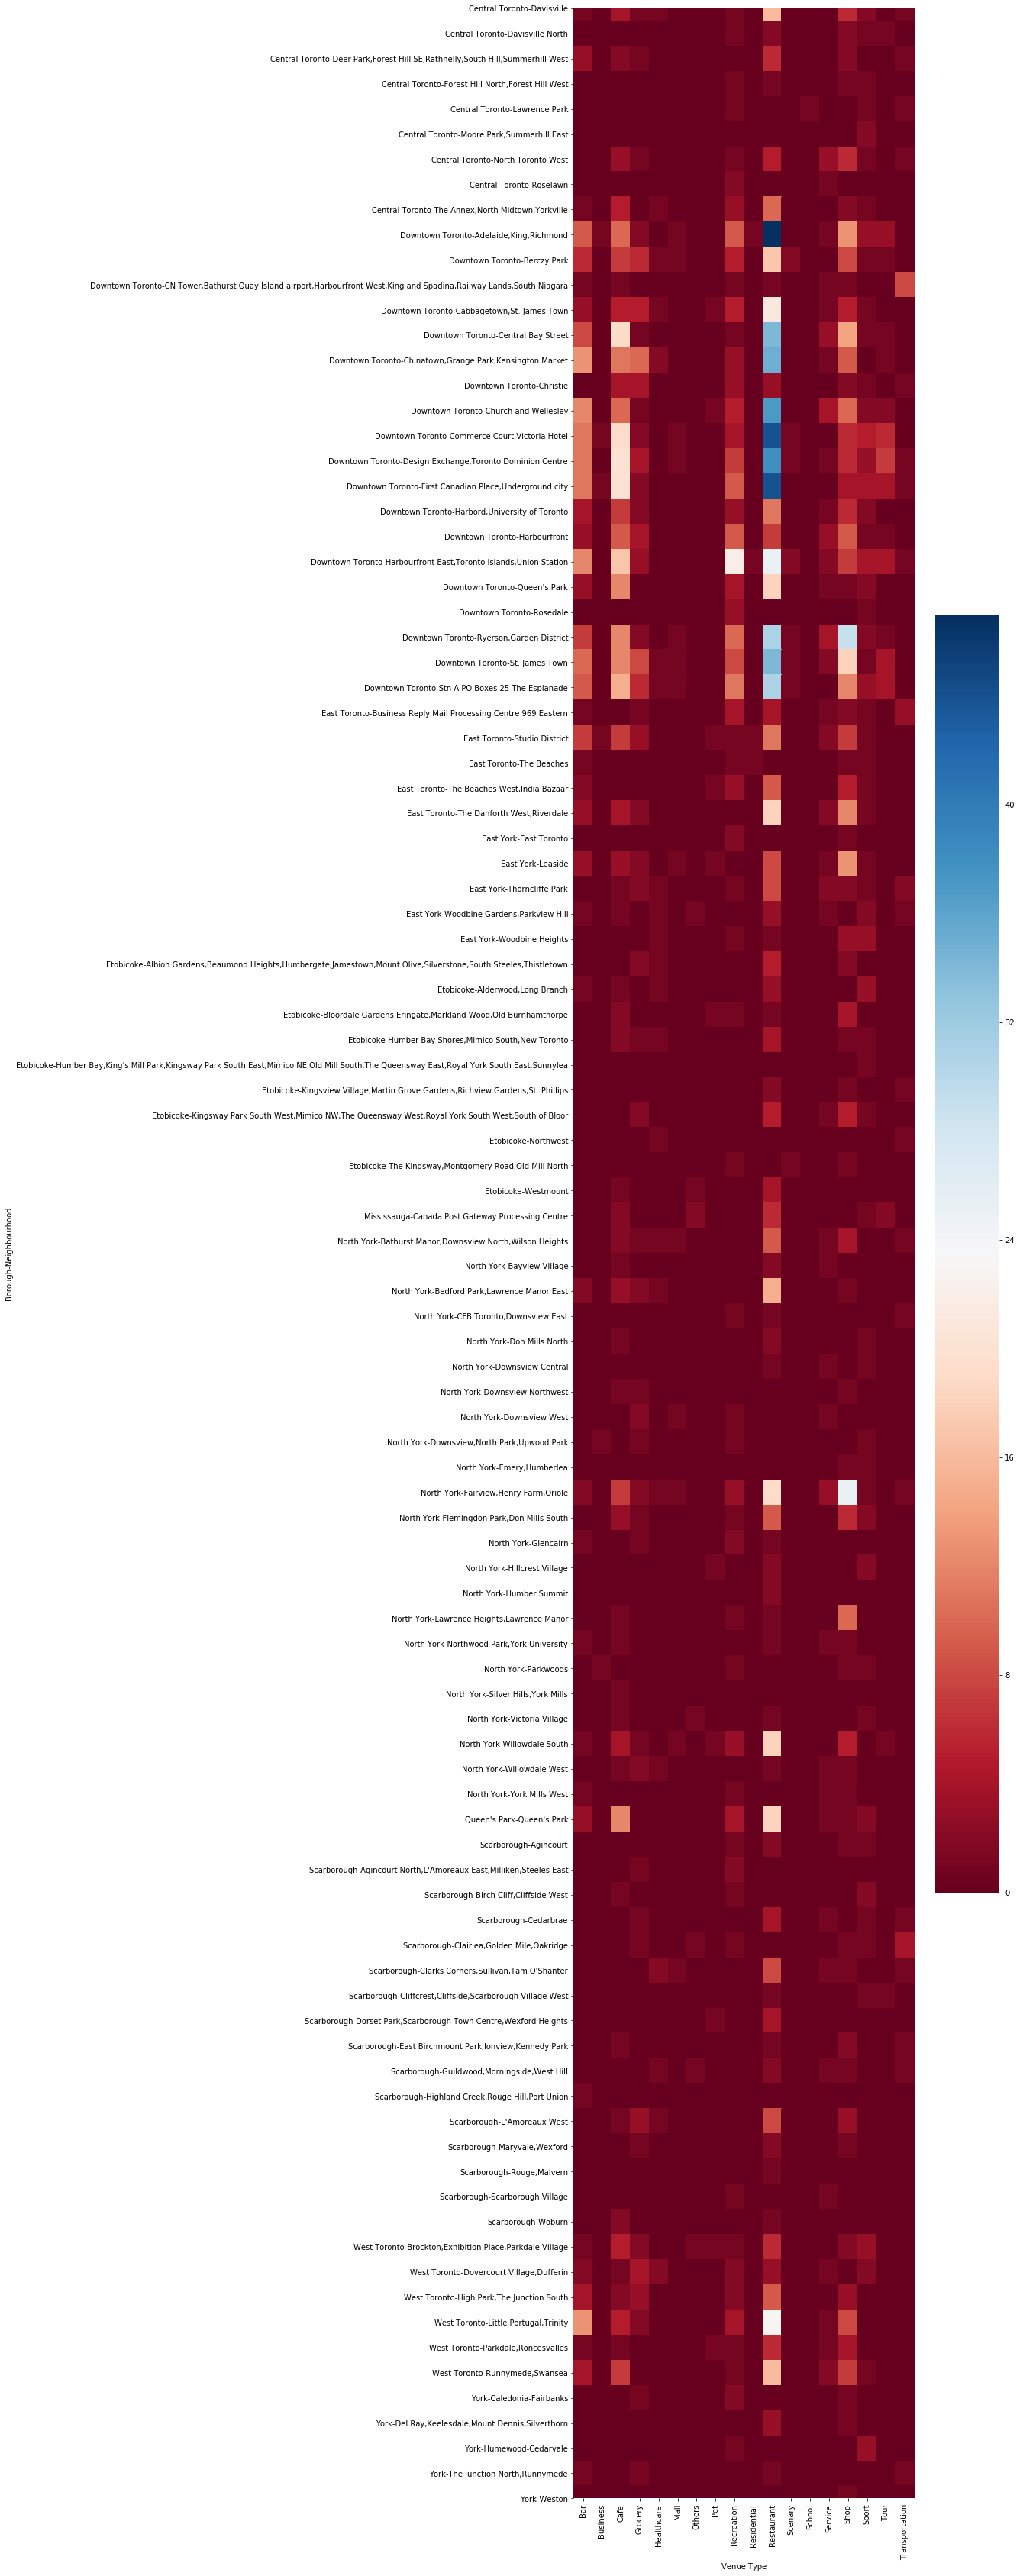

In [85]:
# Create a heatmap
plt.figure(figsize=(10,60))
sns.heatmap(heatmap_data, cmap="RdBu")

#### 3. Map the Top Venues in each Neighbourhood

In [86]:
venues_Toronto.head()

,Neighbourhood,Latitude,Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude,New Category
0,"Rouge,Malvern",43.806686,-79.194353,Wendy's,Fast Food Restaurant,43.807448,-79.199056,Restaurant
1,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Royal Canadian Legion,Bar,43.782533,-79.163085,Bar
2,"Guildwood,Morningside,West Hill",43.763573,-79.188711,G & G Electronics,Electronics Store,43.765309,-79.191537,Shop
3,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Marina Spa,Spa,43.766000,-79.191000,Service
4,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Big Bite Burrito,Mexican Restaurant,43.766299,-79.190720,Restaurant


In [88]:
# venues in Cluster-N neighbourhoods
neighbourhood_cluster4 = np.asarray(Toronto_cluster4['Neighbourhood'])
venues_Toronto_cluster4 = venues_Toronto[venues_Toronto['Neighbourhood'].isin(neighbourhood_cluster4)]
venues_Toronto_cluster4

,Neighbourhood,Latitude,Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude,New Category
2174,"Humber Bay,King's Mill Park,Kingsway Park Sout...",43.636258,-79.498509,Woodford Park,Baseball Field,43.633152,-79.496266,Sport
2200,"Emery,Humberlea",43.724766,-79.532242,Strathburn Park,Baseball Field,43.721765,-79.532854,Sport
2201,"Emery,Humberlea",43.724766,-79.532242,Warren's Waterless Printing,Paper / Office Supplies Store,43.727786,-79.528628,Shop


In [95]:
# add venue icons to the map
map_venues = folium.Map(location=[latitude,longitude], zoom_start=11, min_zoom=10, max_zoom=15)

for lat, lon, name, cat, ven_cat in zip(venues_Toronto_cluster4['Venue Latitude'],
                                        venues_Toronto_cluster4['Venue Longitude'],
                                        venues_Toronto_cluster4['Venue'],
                                        venues_Toronto_cluster4['New Category'],
                                        venues_Toronto_cluster4['Venue Category']):
    icon_url = catIcon_dict[cat]
    icon = folium.features.CustomIcon(icon_url, icon_size=(20,20))
    label = folium.Popup(str(name) + ', ' + str(ven_cat), parse_html=True)
    folium.Marker([lat,lon], icon=icon, popup=label).add_to(map_venues)

map_venues